In [1]:
# %load load_packages.py
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import warnings
from random import randint
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split

warnings.filterwarnings(action='ignore')

def print_package_versions(log_flag=False):
    if(log_flag):
        print("Tensorflow Version :",tf.__version__)
        print("Pandas Version :",pd.__version__)
        print("Numpy Version :",np.__version__)
        print("Keras Version :",keras.__version__)
        print("OpenCV Version :",cv2.__version__)
    else:
        pass

print_package_versions(True)


Tensorflow Version : 1.13.1
Pandas Version : 0.23.4
Numpy Version : 1.15.4
Keras Version : 2.2.4-tf
OpenCV Version : 4.1.0


### <a href="https://github.com/zalandoresearch/fashion-mnist">MNIST Dataset for Fashion</a>

In [2]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(validation_images,validation_labels)=fashion_mnist.load_data()

In [3]:
print("No. of images in Train Dataset : ",train_images.shape[0])
print("Shape of images in Train Dataset :",train_images.shape[1:])
print("*"*50)
print("*"*50)
print("No. of images in Validation Dataset : ",validation_images.shape[0])
print("Shape of images in Validation Dataset :",validation_images.shape[1:])

No. of images in Train Dataset :  60000
Shape of images in Train Dataset : (28, 28)
**************************************************
**************************************************
No. of images in Validation Dataset :  10000
Shape of images in Validation Dataset : (28, 28)


In [4]:
print("No. of Fashion Categories in Training :",np.unique(train_labels).shape[0])
print("*"*50)
print("*"*50)
print("No. of Fashion Categories in Validation :",np.unique(validation_labels).shape[0])

No. of Fashion Categories in Training : 10
**************************************************
**************************************************
No. of Fashion Categories in Validation : 10


In [5]:
labels=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### PreProcess the data

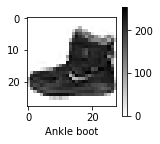

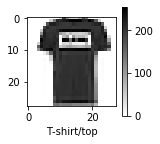

In [6]:
def render_images(images,image_labels,grid_flag=False,flag_cv2=False):
    if(grid_flag is not True):
        if(flag_cv2):
            image=cv2.imshow("Fashion_Image",images)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
        else:
            plt.figure(figsize=(2,2))
            plt.imshow(images,cmap=plt.cm.binary)
            plt.colorbar()
            plt.xlabel(image_labels)
    else:
        plt.figure(figsize=(15,15))
        for i in range(images.shape[0]):
            plt.subplot(10,10,i+1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(images[i], cmap=plt.cm.binary)
            plt.xlabel(labels[image_labels[i]])
        plt.show()
    

for i in range(2):
    render_images(train_images[i],labels[train_labels[i]])

Grid Rendering :


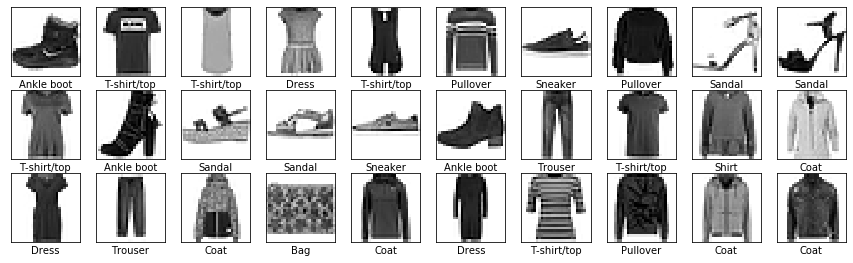

In [7]:
print("Grid Rendering :")    
render_images(train_images[0:30],train_labels[0:30],grid_flag=True)

### Model Building

1. Define the Layers
2. Compile the Model
3. Train the Model
4. Evaluated the Model Accuracy on Hold-Out Set or Validation-Set
5. Make Prediction for Scoring Data-Set

In [8]:
# import warnings
# warnings.filterwarnings(action='ignore')

In [9]:
train_images=train_images/255.
validation_images=validation_images/255.

In [10]:
train_x,test_x,train_y,test_y=train_test_split(train_images,train_labels,stratify=train_labels,
                                               test_size=0.16666,shuffle=True)
train_x.shape,test_x.shape

((50000, 28, 28), (10000, 28, 28))

In [12]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=train_images.shape[1:]),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(rate=0.0),
    keras.layers.Dense(10, activation=tf.nn.softmax),
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [21]:
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
             )

In [22]:
# model.fit(train_x, train_y, epochs=100,verbose=0,use_multiprocessing=True,workers=4,validation_data=(test_x,test_y))
model.fit(train_images, train_labels, epochs=10,verbose=0,use_multiprocessing=True,workers=4,validation_split=0.16666)

In [23]:
training_loss,training_accuracy=model.evaluate(train_images,train_labels)
validation_loss,validation_accuracy=model.evaluate(validation_images,validation_labels)

10000/10000 [==============================] - 1s 100us/sample - loss: 0.4427 - acc: 0.8668


In [24]:
print("Train Loss : %s and Traing Accuracy : %s"%(training_loss,training_accuracy))
print("*"*50)
print("*"*50)
print("Validation Loss : %s and Validation Accuracy : %s"%(validation_loss,validation_accuracy))

Train Loss : 0.27992706015904745 and Traing Accuracy : 0.8994833
**************************************************
**************************************************
Validation Loss : 0.442652401971817 and Validation Accuracy : 0.8668


In [25]:
predictions=model.predict(validation_images)

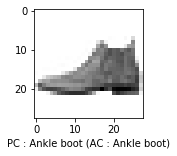

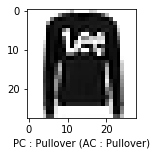

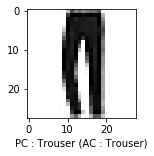

In [26]:
for i in range(3):
    plt.figure(figsize=(2,2))
    plt.imshow(validation_images[i],cmap=plt.cm.binary)
    plt.xlabel('PC : {0} (AC : {1})'.format(labels[validation_labels[i]],labels[np.argmax(predictions[i])]))
    plt.show()

### Plot image result for random 30 images 

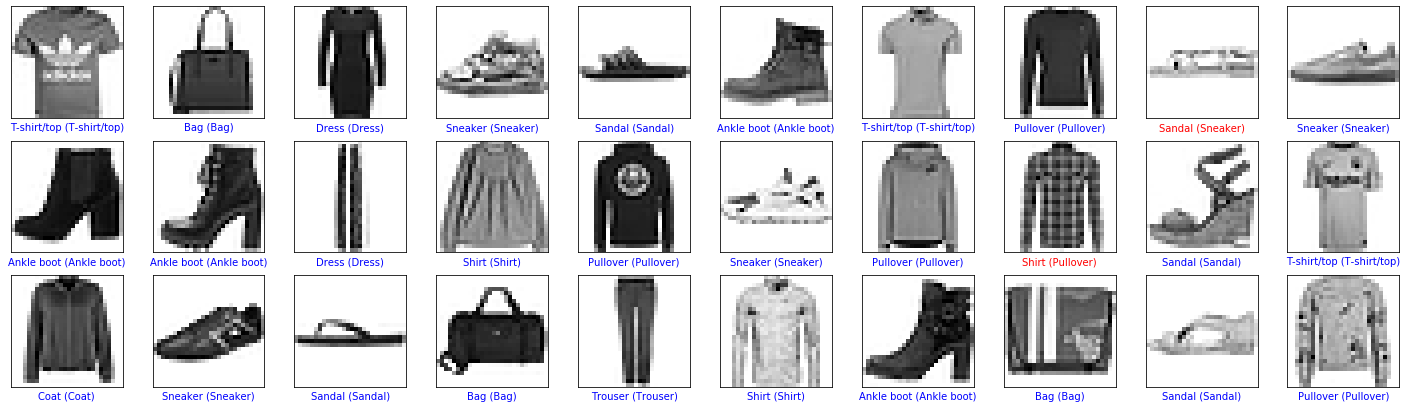

In [27]:
plt.figure(figsize=(25,7))

for i in range(30):
    plt.subplot(3,10,i+1)
    plt.xticks([])
    plt.yticks([])
    image_index=randint(0,validation_labels.shape[0])
    plt.imshow(validation_images[image_index], cmap=plt.cm.binary)
    if(validation_labels[image_index]==np.argmax(predictions[image_index])):
        plt.xlabel('{0} ({1})'.format(labels[validation_labels[image_index]],labels[np.argmax(predictions[image_index])]),color='blue')
    else:
        plt.xlabel('{0} ({1})'.format(labels[validation_labels[image_index]],labels[np.argmax(predictions[image_index])]),color='red')
plt.show()